<a href="https://colab.research.google.com/github/Lohitgudivada/ml/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
import math

In [33]:
dt= pd.read_csv('/content/buy.csv')
dt

,AGE,INCOME,STUDENT,CREDIT_EARNING,BUYS_COMPUTER
0,-1,1,0,0,0
1,-1,1,0,1,0
2,0,1,0,0,1
3,1,0,0,0,1
4,1,-1,1,0,1
5,1,-1,1,1,0
6,0,-1,1,1,1
7,-1,0,0,0,0
8,-1,-1,1,0,1
9,1,0,1,0,1


In [34]:
df= pd.read_csv('/content/project dataset 1.csv')
df

,District Name,state,Connected to All weather road,Internal Pucca Roads (Cc/ Brick Road),Public Transport,Public Distribution System(PDS),Piped tap water,Drainage facilities,Community waste disposal system,Community bio gas or recycle of waste for production use,Aanganwadi Centre
0,All India,NaN,443734,438576,448090,312961,421282,449704,102392,38775,510774
1,ANANTAPUR (502),AP,979,1006,1135,1128,1182,922,586,146,1174
2,CHITTOOR (503),AP,1701,1738,1806,1693,1912,1526,1280,424,1768
3,Y.S.R. (504),AP,960,938,998,932,1060,593,577,105,986
4,EAST GODAVARI (505),AP,1336,1343,1553,1331,1681,1269,603,163,1629
...,...,...,...,...,...,...,...,...,...,...,...
706,NADIA (320),WB,1094,952,1252,652,976,766,70,47,1231
707,PURULIA (321),WB,1842,1563,1487,1213,849,973,125,88,2286
708,Alipurduar (664),WB,270,234,289,204,199,264,15,5,346
709,Jhargram (703),WB,1471,1375,1262,350,1491,975,10,14,1769


In [35]:
mean=df['Connected to All weather road'].mean()
mean

1247.57805907173

In [36]:
df1=df['Connected to All weather road']>= mean
df2=df1.replace(to_replace=True,value='High')
df3=df2.replace(to_replace=False,value='Low')

In [37]:
df['classify']=df3
df

,District Name,state,Connected to All weather road,Internal Pucca Roads (Cc/ Brick Road),Public Transport,Public Distribution System(PDS),Piped tap water,Drainage facilities,Community waste disposal system,Community bio gas or recycle of waste for production use,Aanganwadi Centre,classify
0,All India,NaN,443734,438576,448090,312961,421282,449704,102392,38775,510774,High
1,ANANTAPUR (502),AP,979,1006,1135,1128,1182,922,586,146,1174,Low
2,CHITTOOR (503),AP,1701,1738,1806,1693,1912,1526,1280,424,1768,High
3,Y.S.R. (504),AP,960,938,998,932,1060,593,577,105,986,Low
4,EAST GODAVARI (505),AP,1336,1343,1553,1331,1681,1269,603,163,1629,High
...,...,...,...,...,...,...,...,...,...,...,...,...
706,NADIA (320),WB,1094,952,1252,652,976,766,70,47,1231,Low
707,PURULIA (321),WB,1842,1563,1487,1213,849,973,125,88,2286,High
708,Alipurduar (664),WB,270,234,289,204,199,264,15,5,346,Low
709,Jhargram (703),WB,1471,1375,1262,350,1491,975,10,14,1769,High


In [38]:
x = dt.drop('BUYS_COMPUTER',axis=1)
y = dt['BUYS_COMPUTER']
Tr_x,Te_x,Tr_y,Te_y=train_test_split(x,y,test_size=0.3)

2

In [39]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model= model.fit(Tr_x,Tr_y)
model.score(Tr_x, Tr_y)
print(model.get_depth())

3


3

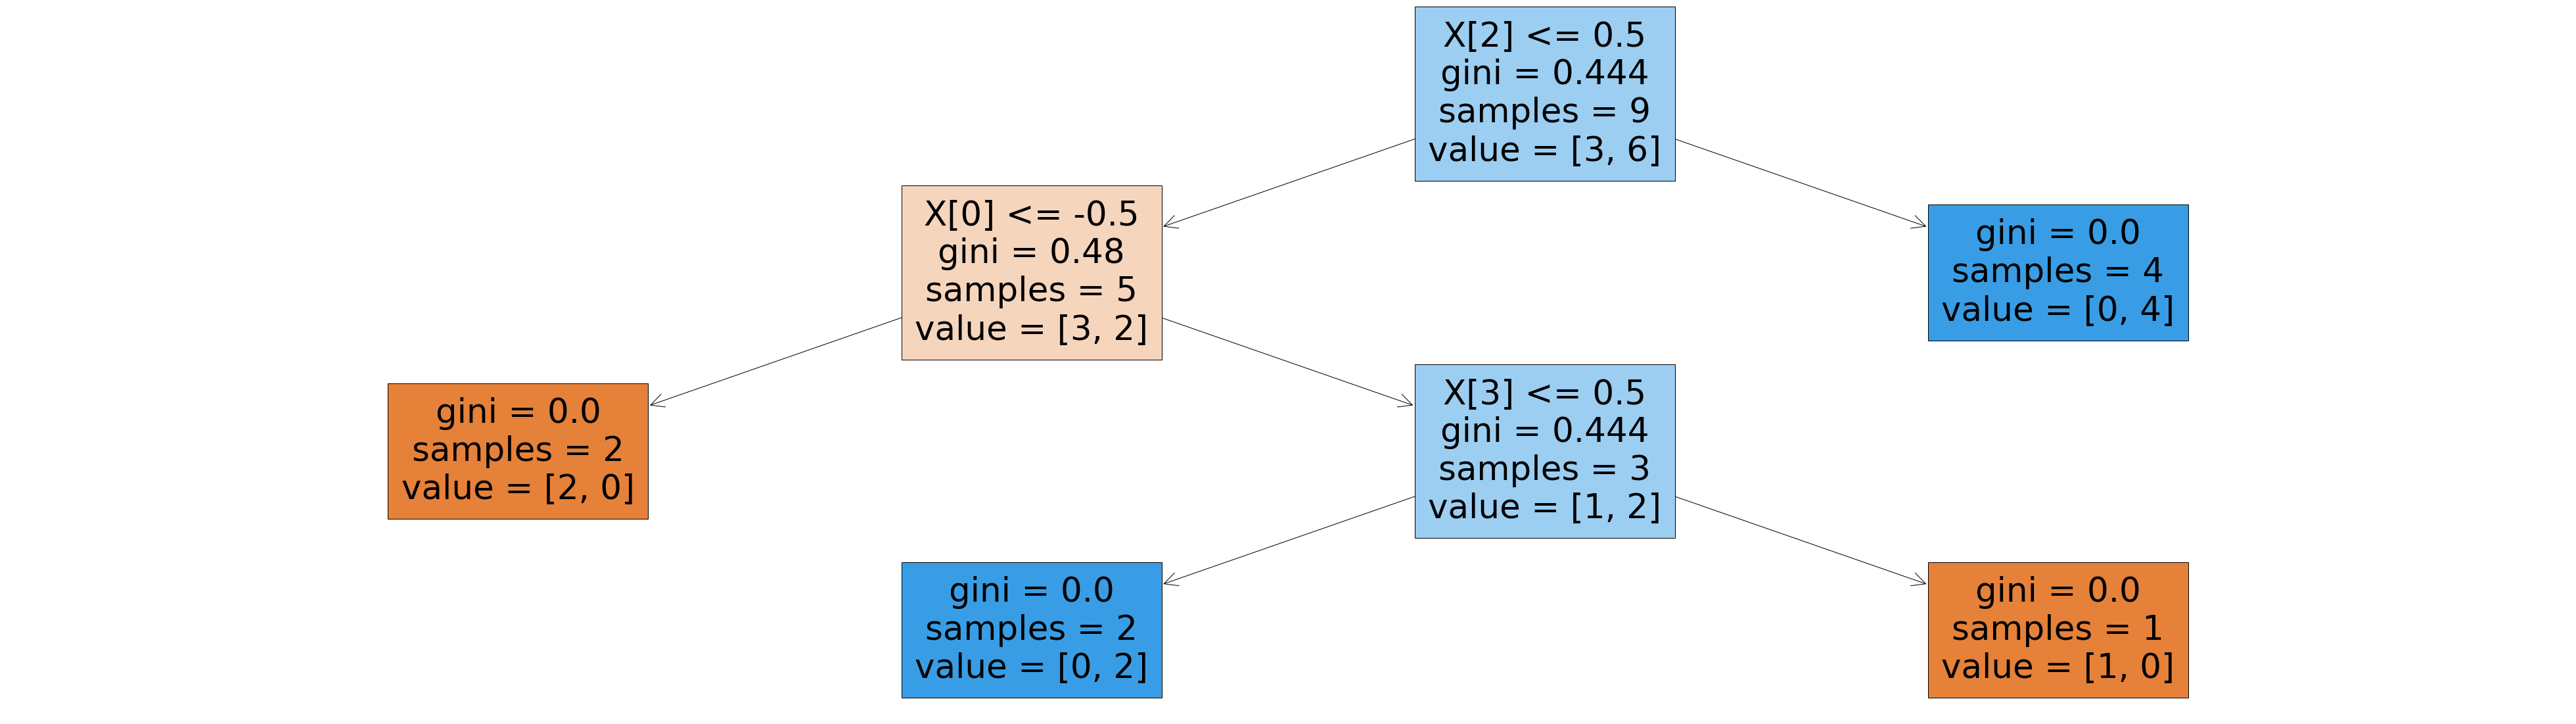

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()

4

In [44]:
df= df.drop('state',axis=1)
m= df.drop('classify',axis=1)
n= df['Connected to All weather road']
Tr_m,Te_m,Tr_n,Te_n=train_test_split(m,n,test_size=0.3)

In [45]:
model= DecisionTreeClassifier()
model= model.fit(Tr_m,Tr_n)
model.score(Tr_m, Tr_n)
model.score(Te_m, Te_n)
print(model.get_depth())

38


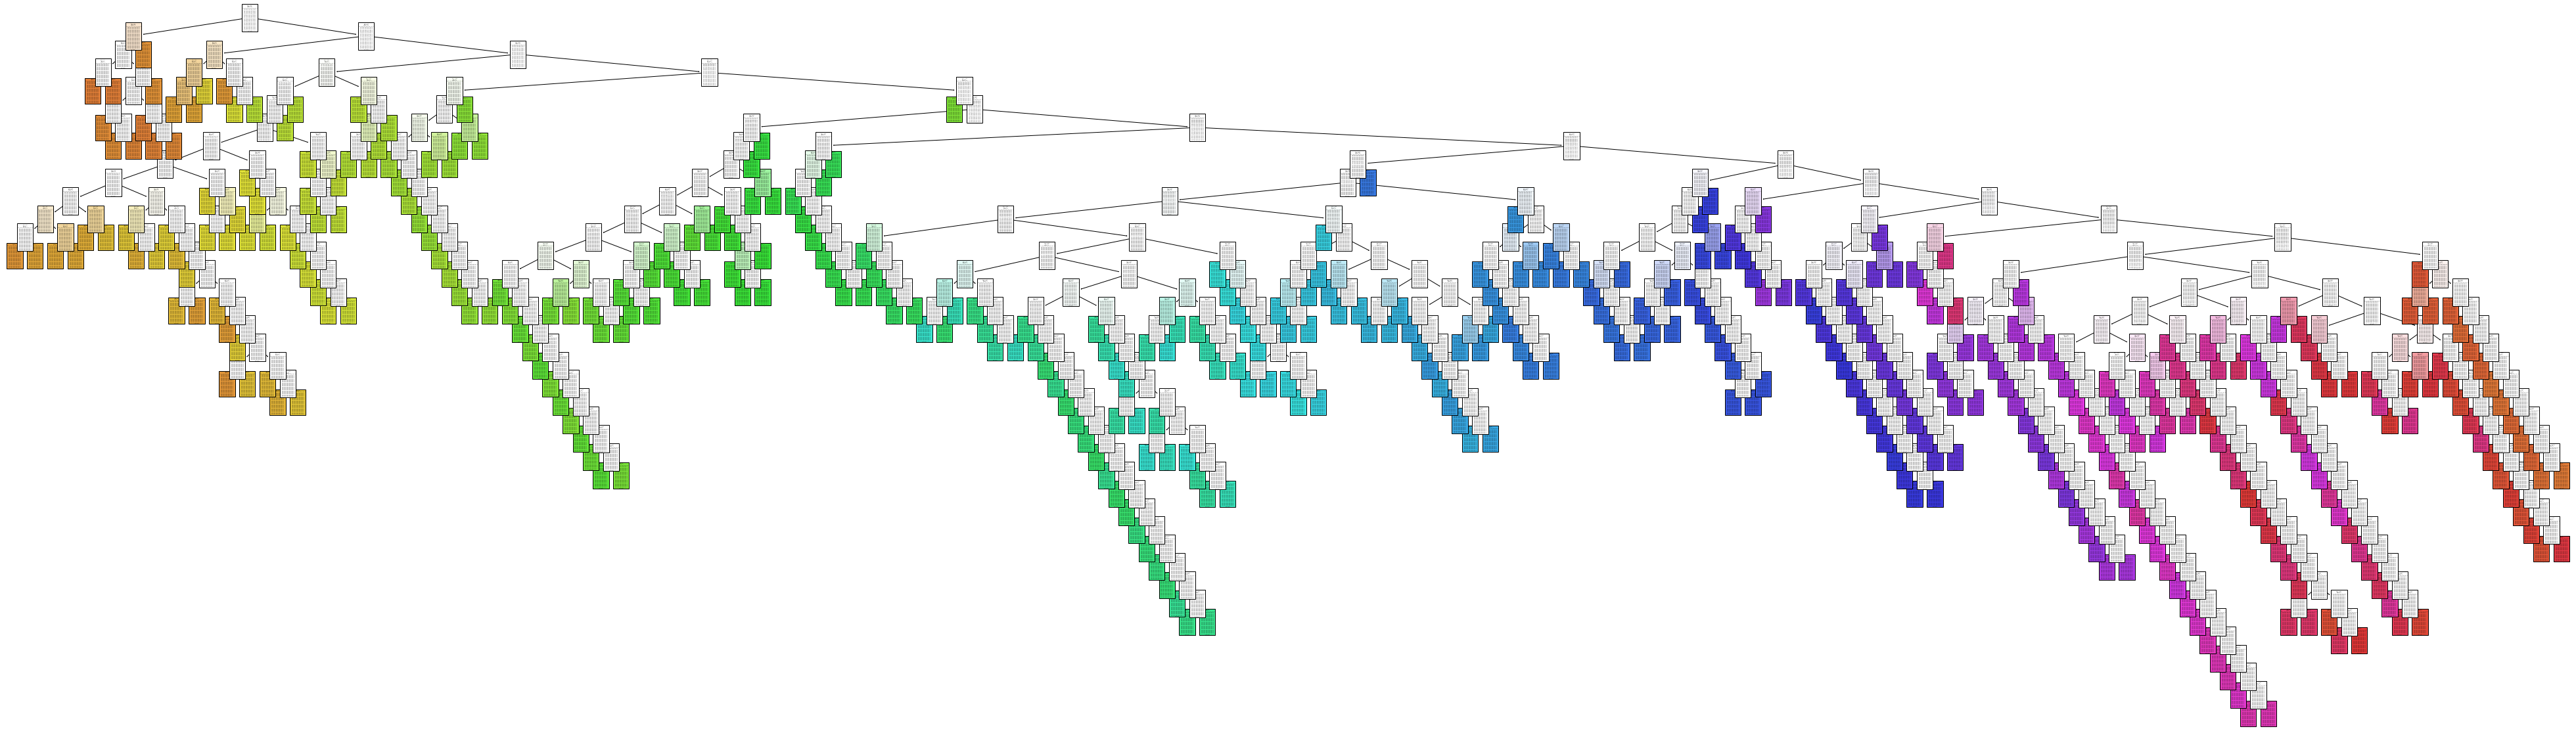

In [46]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()

5

In [47]:
model= DecisionTreeClassifier(max_depth=5)
model= model.fit(Tr_x,Tr_y)
model.score(Tr_x, Tr_y)
model.score(Te_x, Te_y)
print(model.get_depth())

3


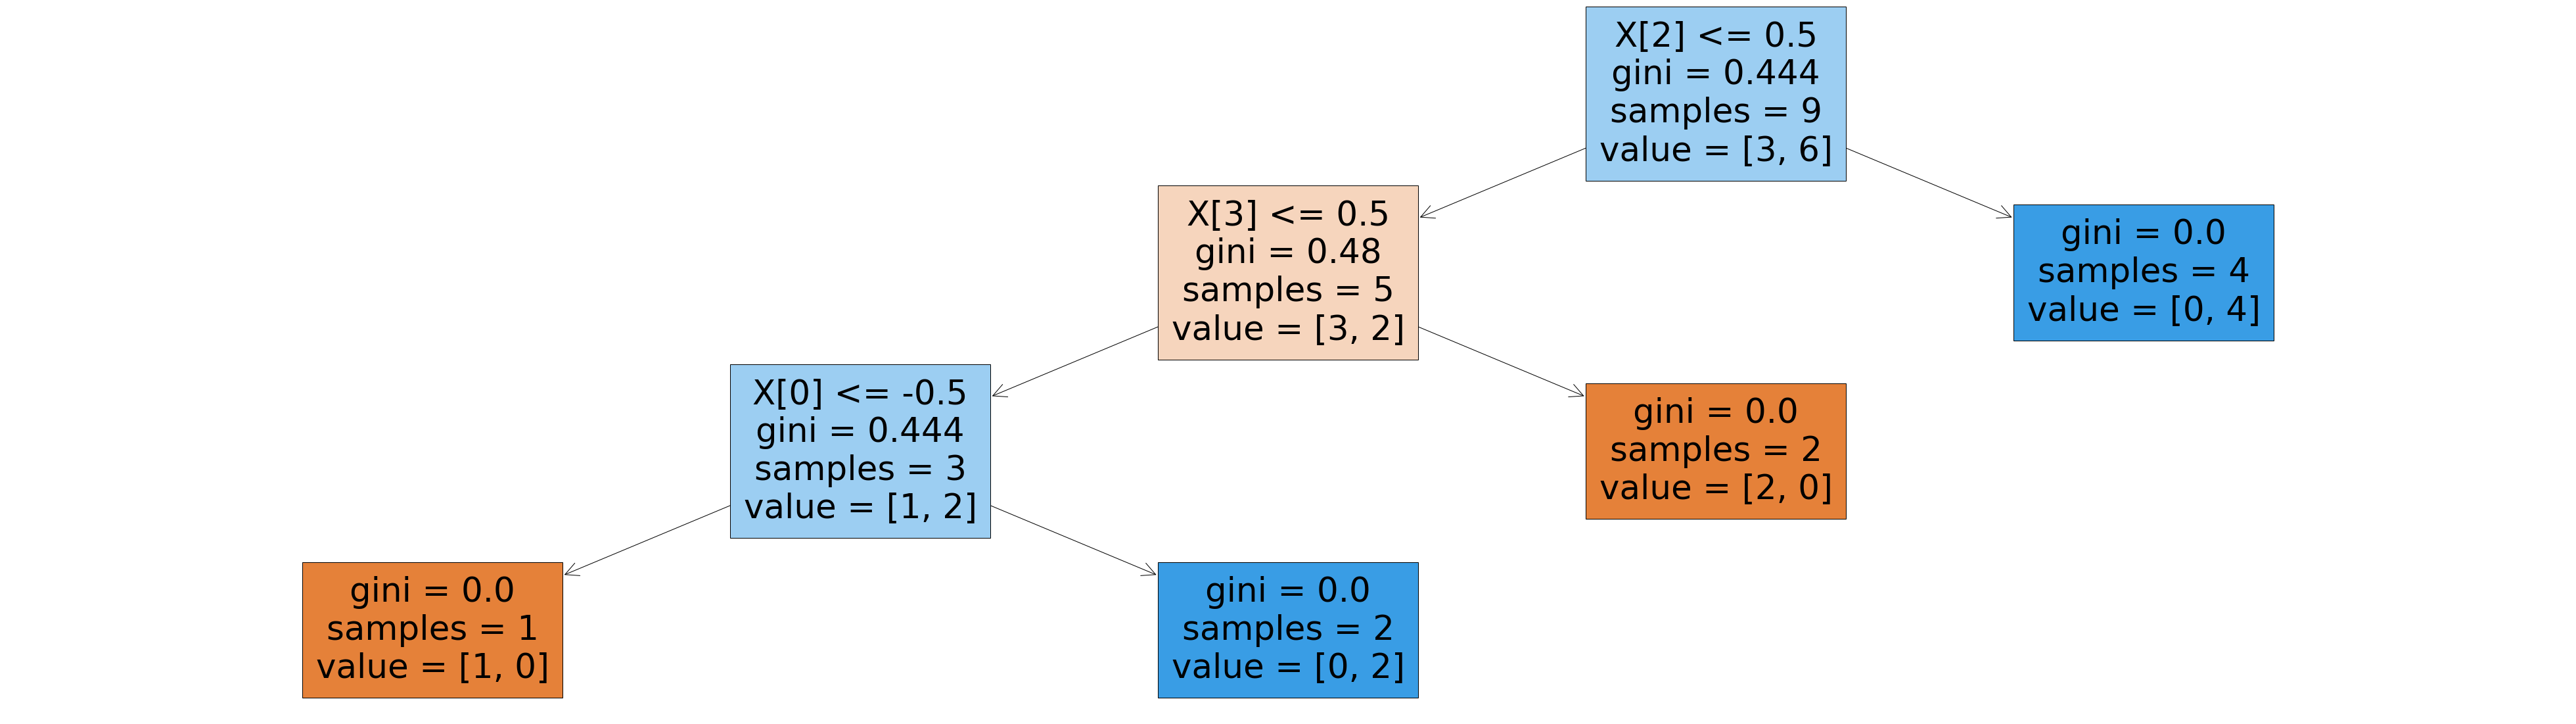

In [48]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()

6

In [49]:
model= DecisionTreeClassifier(criterion="entropy")
model= model.fit(Tr_x,Tr_y)
model.score(Tr_x, Tr_y)
model.score(Te_x, Te_y)
print(model.get_depth())

3


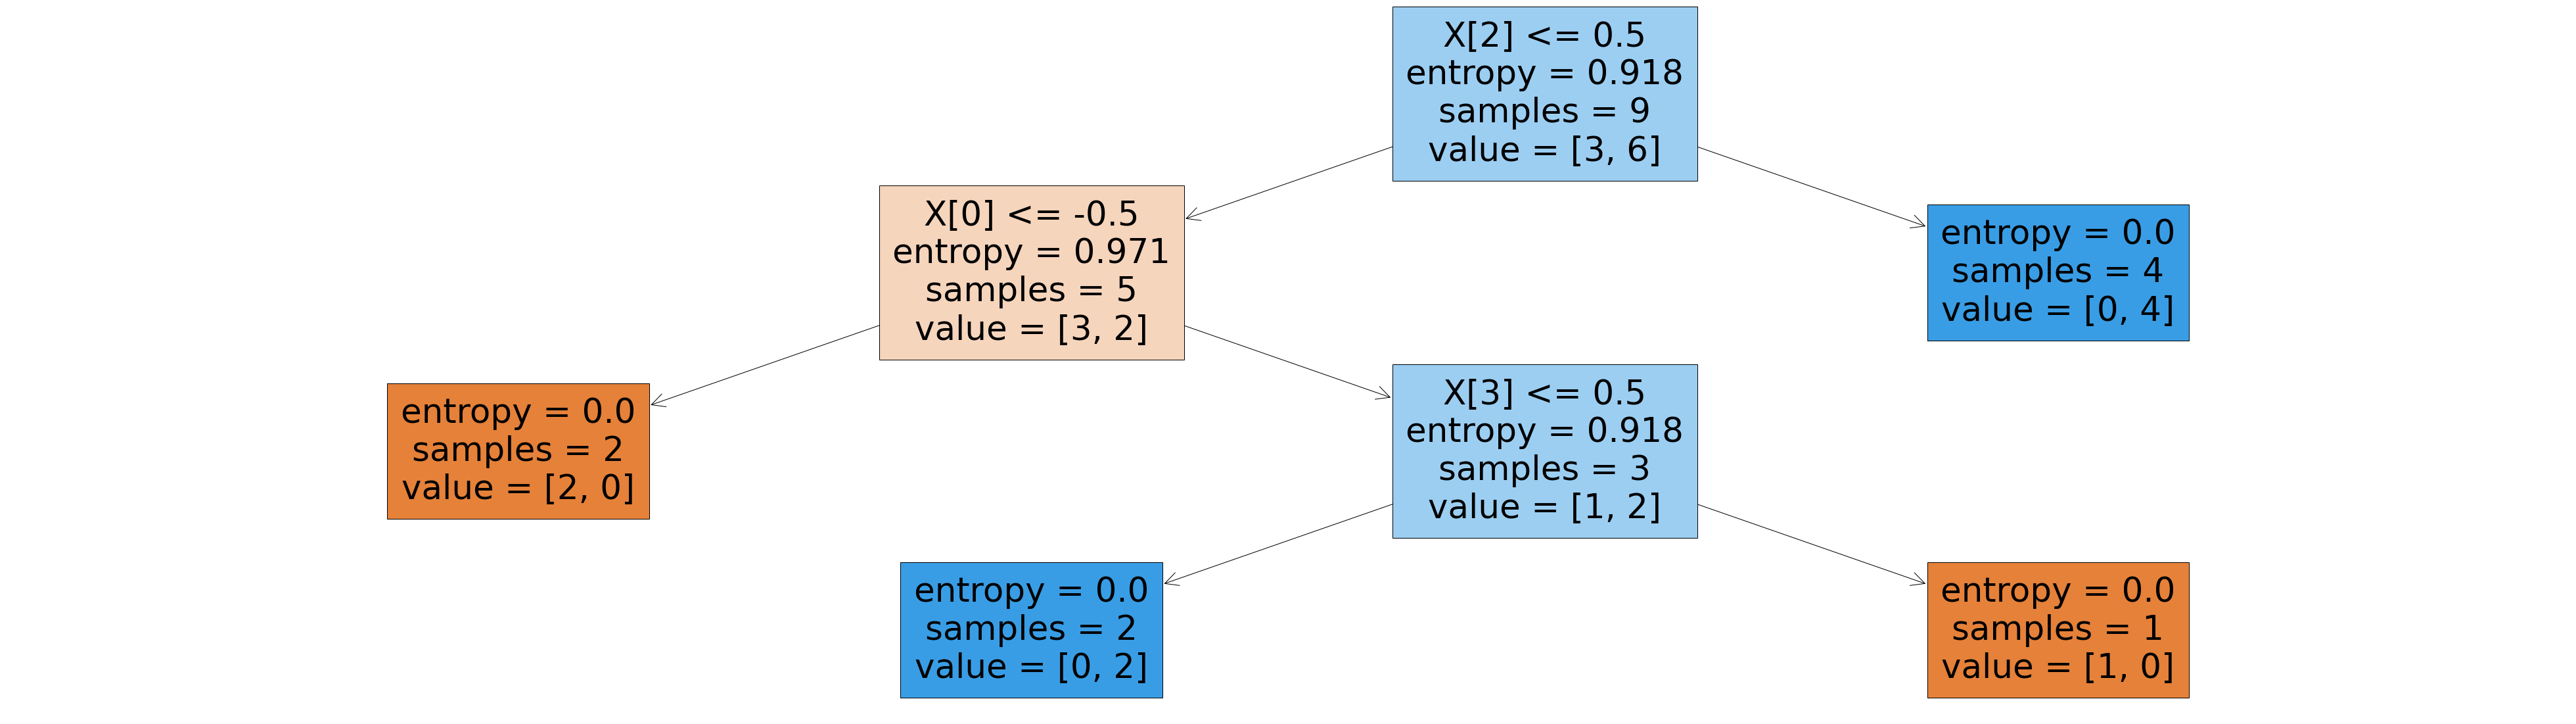

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()